<a href="https://colab.research.google.com/github/cheerswym/DeepLearning/blob/master/ResNet_Transfer_Learning_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
  layer.trainable = False

234700800/234698864 [==============================] - 4s 0us/step


In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

In [ ]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = head_model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 44s 33ms/step - loss: 1.2104 - accuracy: 0.5902 - val_loss: 0.4982 - val_accuracy: 0.8450
Epoch 2/40
907/907 [==============================] - 28s 31ms/step - loss: 0.6148 - accuracy: 0.8014 - val_loss: 0.3869 - val_accuracy: 0.8955
Epoch 3/40
907/907 [==============================] - 29s 32ms/step - loss: 0.5172 - accuracy: 0.8325 - val_loss: 0.3259 - val_accuracy: 0.9065
Epoch 4/40
907/907 [==============================] - 28s 31ms/step - loss: 0.4702 - accuracy: 0.8459 - val_loss: 0.3525 - val_accuracy: 0.8925
Epoch 5/40
907/907 [==============================] - 28s 31ms/step - loss: 0.4441 - accuracy: 0.8518 - val_loss: 0.3125 - val_accuracy: 0.9125
Epoch 6/40
907/907 [==============================] - 29s 31ms/step - loss: 0.4011 - accuracy: 0.8679 - val_loss: 0.2554 - val_accuracy: 0.9310
Epoch 7/40
907/907 [==============================] - 28s 31ms/step - loss: 0.3739 - accuracy: 0.8790 - val_loss: 0.3459 - val_accuracy:

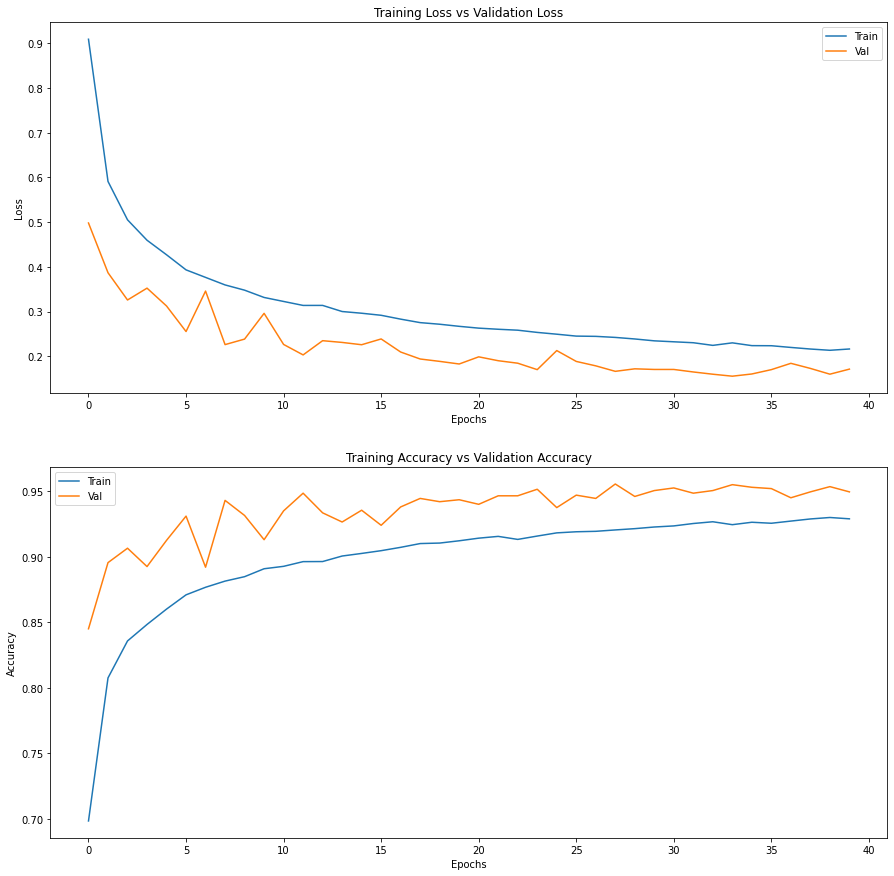

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
head_model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.2287 - accuracy: 0.9275


[0.22868101298809052, 0.9275000095367432]